# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [1]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
# Inspect the shapes of the datasets

print("Training data shape:", X_train.shape) 
print("Training labels shape:", y_train.shape)  
print("Test data shape:", X_test.shape)         
print("Test labels shape:", y_test.shape)


# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

print("One-hot encoded training labels shape:", y_train_cat.shape)
print("One-hot encoded test labels shape:", y_test_cat.shape)     



Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)
One-hot encoded training labels shape: (60000, 10)
One-hot encoded test labels shape: (10000, 10)


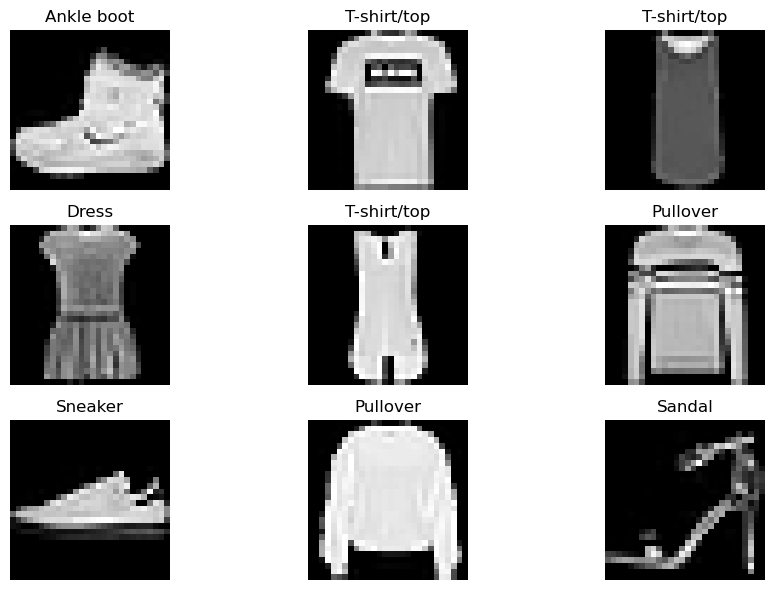

In [4]:
import matplotlib.pyplot as plt
# Verify the data looks as expected

plt.figure(figsize=(10, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

**Your answer here**
The dataset appears as expected, with each 28x28 grayscale image clearly representing a clothing item. Most items are distinguishable, but some classes, like T-shirt/top, Pullover, and Dress, look quite similar, which could lead to model confusion. The image quality is sufficient for shape based classification, though the lack of color and detail may limit the model's ability to capture subtle features.

Overall, the dataset looks clean and well-suited for training a basic image classification model.

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

# Create a simple linear regression model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='softmax'))

# You can use `model.add(<layer>)` to add layers to the model

# Compile the model using `model.compile()`
model.compile(optimizer=SGD(learning_rate=0.01), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model with `model.fit()`
history = model.fit(X_train, y_train_cat, 
                    epochs=10, 
                    batch_size=32, 
                    validation_split=0.2, 
                    verbose=2)
# Evaluate the model with `model.evaluate()`
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=0)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Epoch 1/10
1500/1500 - 2s - 1ms/step - accuracy: 0.7213 - loss: 0.8781 - val_accuracy: 0.7778 - val_loss: 0.6614
Epoch 2/10
1500/1500 - 1s - 968us/step - accuracy: 0.8003 - loss: 0.6173 - val_accuracy: 0.8067 - val_loss: 0.5796
Epoch 3/10
1500/1500 - 1s - 969us/step - accuracy: 0.8164 - loss: 0.5620 - val_accuracy: 0.8191 - val_loss: 0.5440
Epoch 4/10
1500/1500 - 1s - 961us/step - accuracy: 0.8247 - loss: 0.5326 - val_accuracy: 0.8229 - val_loss: 0.5234
Epoch 5/10
1500/1500 - 2s - 1ms/step - accuracy: 0.8305 - loss: 0.5131 - val_accuracy: 0.8273 - val_loss: 0.5097
Epoch 6/10
1500/1500 - 1s - 969us/step - accuracy: 0.8351 - loss: 0.4990 - val_accuracy: 0.8298 - val_loss: 0.4986
Epoch 7/10
1500/1500 - 1s - 979us/step - accuracy: 0.8376 - loss: 0.4884 - val_accuracy: 0.8333 - val_loss: 0.4881
Epoch 8/10
1500/1500 - 2s - 1ms/step - accuracy: 0.8392 - loss: 0.4795 - val_accuracy: 0.8368 - val_loss: 0.4806
Epoch 9/10
1500/1500 - 1s - 980us/step - accuracy: 0.8417 - loss: 0.4723 - val_accurac

Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

**Your answer here**

The baseline model achieved about 83% test accuracy, which is expected for a simple linear model. Because it flattens images and doesn’t capture spatial patterns, its performance is limited. This level shows the model can learn some basic features, but more complex models like CNNs are needed to improve accuracy.

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [9]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Create a simple CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_cat,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=2)

# Evaluate the model
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Epoch 1/10
1500/1500 - 34s - 22ms/step - accuracy: 0.0989 - loss: 2.3028 - val_accuracy: 0.1013 - val_loss: 2.3027
Epoch 2/10
1500/1500 - 33s - 22ms/step - accuracy: 0.1012 - loss: 2.3028 - val_accuracy: 0.0957 - val_loss: 2.3027
Epoch 3/10
1500/1500 - 34s - 22ms/step - accuracy: 0.0979 - loss: 2.3028 - val_accuracy: 0.0983 - val_loss: 2.3028
Epoch 4/10
1500/1500 - 33s - 22ms/step - accuracy: 0.0990 - loss: 2.3028 - val_accuracy: 0.0957 - val_loss: 2.3028
Epoch 5/10
1500/1500 - 34s - 22ms/step - accuracy: 0.1002 - loss: 2.3027 - val_accuracy: 0.0995 - val_loss: 2.3027
Epoch 6/10
1500/1500 - 33s - 22ms/step - accuracy: 0.0987 - loss: 2.3028 - val_accuracy: 0.1003 - val_loss: 2.3026
Epoch 7/10
1500/1500 - 34s - 22ms/step - accuracy: 0.0982 - loss: 2.3028 - val_accuracy: 0.1030 - val_loss: 2.3026
Epoch 8/10
1500/1500 - 34s - 22ms/step - accuracy: 0.0994 - loss: 2.3027 - val_accuracy: 0.1030 - val_loss: 2.3027
Epoch 9/10
1500/1500 - 33s - 22ms/step - accuracy: 0.0989 - loss: 2.3027 - val_a

Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

**Your answer here**
No, the CNN model did not perform better than the baseline. Its accuracy stayed around 10%, indicating it failed to learn. In contrast, the baseline model achieved 82.87% accuracy. This likely happened due to incorrect preprocessing, such as missing normalization or improper label encoding. Fixing these issues should allow the CNN to outperform the baseline, as it is better at capturing spatial patterns in images.

# 3. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

65-# A. Test Hyperparameters
from keras.layers import Input 

filter_sizes = [16, 32, 64]
test_accuracies = []

for filters in filter_sizes:
    model = Sequential()
    model.add(Input(shape=(28, 28, 1)))
    model.add(Conv2D(filters, (3, 3), activation='relu'))
    model.add(MaxPooling2D(2, 2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(X_train, y_train_cat, epochs=3, validation_split=0.2, verbose=0)

    test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
    print(f"Filters: {filters}, Test Accuracy: {test_acc:.4f}")
    test_accuracies.append(test_acc)

In [14]:
from keras.layers import Input
model = Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train_cat, epochs=3, validation_split=0.2, verbose=2)

test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/3
1500/1500 - 10s - 7ms/step - accuracy: 0.0983 - loss: 2.3028 - val_accuracy: 0.0957 - val_loss: 2.3028
Epoch 2/3
1500/1500 - 10s - 6ms/step - accuracy: 0.0989 - loss: 2.3028 - val_accuracy: 0.1003 - val_loss: 2.3027
Epoch 3/3
1500/1500 - 10s - 6ms/step - accuracy: 0.1001 - loss: 2.3028 - val_accuracy: 0.1003 - val_loss: 2.3027
Test Accuracy: 0.1000


In [18]:
# B. Test presence or absence of regularization
from tensorflow.keras.layers import Dropout

def build_model_with_dropout(use_dropout=False):
    model = Sequential()
    model.add(Input(shape=(28, 28, 1)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(2, 2))
    
    if use_dropout:
        model.add(Dropout(0.5)) 

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


regularization_results = {}


model_no_dropout = build_model_with_dropout(use_dropout=False)
model_no_dropout.fit(X_train, y_train, epochs=5, verbose=0)
loss_no_dropout, acc_no_dropout = model_no_dropout.evaluate(X_test, y_test, verbose=0)
regularization_results['Without Dropout'] = acc_no_dropout


model_with_dropout = build_model_with_dropout(use_dropout=True)
model_with_dropout.fit(X_train, y_train, epochs=5, verbose=0)
loss_with_dropout, acc_with_dropout = model_with_dropout.evaluate(X_test, y_test, verbose=0)
regularization_results['With Dropout'] = acc_with_dropout


for condition, acc in regularization_results.items():
    print(f"{condition}: Test Accuracy = {acc:.4f}")

Without Dropout: Test Accuracy = 0.1000
With Dropout: Test Accuracy = 0.1000


Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

**Your answer here**

Adding dropout did not improve model performance; both models with and without dropout achieved the same low test accuracy (10%). This suggests the model may not be learning at all,  possibly due to issues like incorrect label encoding, model architecture, or data scaling. Regularization didn’t help because the baseline model itself is underperforming.

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [19]:
final_model = Sequential()
final_model.add(Input(shape=(28, 28, 1)))
final_model.add(Conv2D(32, (3, 3), activation='relu'))
final_model.add(MaxPooling2D(2, 2))
final_model.add(Dropout(0.5))
final_model.add(Flatten())
final_model.add(Dense(64, activation='relu'))
final_model.add(Dense(10, activation='softmax'))

final_model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

final_model.fit(X_train, y_train, epochs=5, verbose=1)

final_loss, final_accuracy = final_model.evaluate(X_test, y_test, verbose=0)

print(f"Final Model Test Accuracy: {final_accuracy:.4f}")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.0996 - loss: 2.3028
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.0985 - loss: 2.3028
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1012 - loss: 2.3027
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1016 - loss: 2.3027
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1016 - loss: 2.3028
Final Model Test Accuracy: 0.1000


Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

**Your answer here**

The final model’s accuracy (approx 10%) was nearly the same as the baseline, indicating that the model failed to learn meaningful patterns. This poor performance is likely due to missing data preprocessing,; specifically, the input images were not normalized (pixel values should be scaled between 0 and 1). Without normalization, the model struggles to converge. Given more time, I would normalize the input, try different optimizers like Adam, and add batch normalization to improve learning

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 06/07/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-6-ml-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.